In [84]:
#importing all libraries
from sklearn.cluster import KMeans

import plotly as py
import plotly.graph_objs as go
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [85]:
Dataframe = pd.read_csv('/content/Customer Dataset.csv')
Dataframe.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [86]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
 5   cluster         200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [87]:
Dataframe.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score',
       'cluster'],
      dtype='object')

In [88]:
Dataframe.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
cluster           0
dtype: int64

In [89]:
Dataframe.describe()

,CustomerID,Age,Annual_Income,Spending_Score,cluster
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,38.850000,60.560000,50.200000,2.24500
std,57.879185,13.969007,26.264721,25.823522,1.81423
min,1.000000,18.000000,15.000000,1.000000,0.00000
25%,50.750000,28.750000,41.500000,34.750000,1.00000
50%,100.500000,36.000000,61.500000,50.000000,2.00000
75%,150.250000,49.000000,78.000000,73.000000,4.00000
max,200.000000,70.000000,137.000000,99.000000,5.00000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



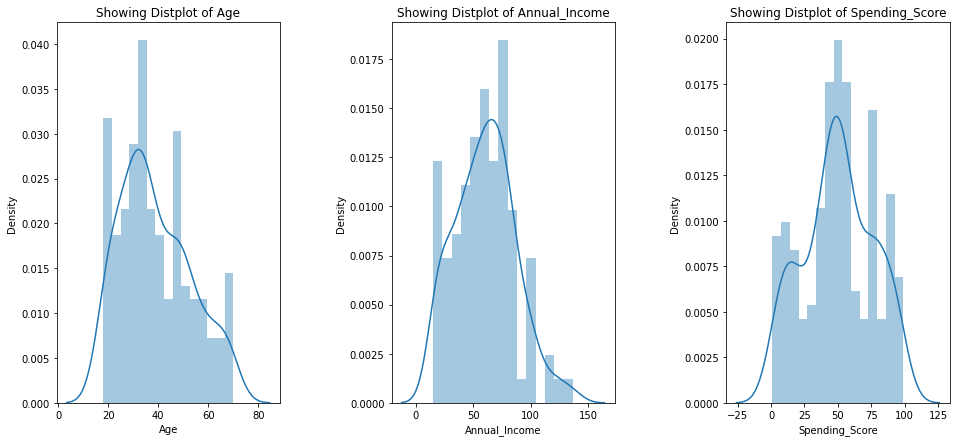

In [90]:
plt.figure(1 , figsize = (16 , 7))
Number = 0 
for Mylist in ['Age' , 'Annual_Income' , 'Spending_Score']:
    Number += 1
    plt.subplot(1 , 3 , Number)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5) 
    sns.distplot(Dataframe[Mylist] , bins = 15) 
    plt.title('Showing Distplot of {}'.format(Mylist))
plt.show()

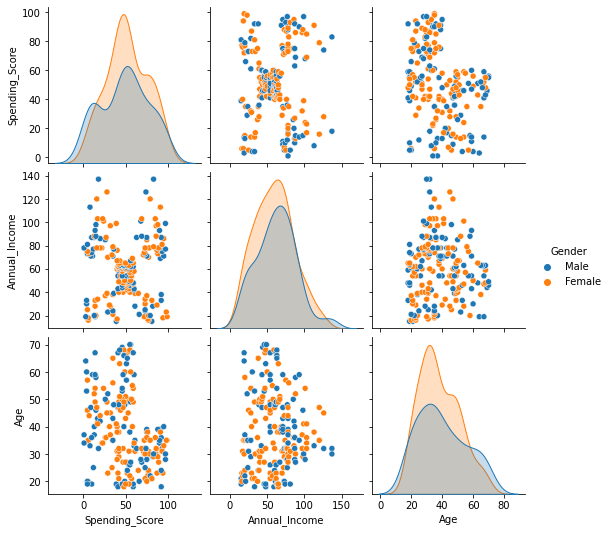

In [91]:
sns.pairplot(Dataframe, vars = ['Spending_Score', 'Annual_Income', 'Age'], hue = "Gender")

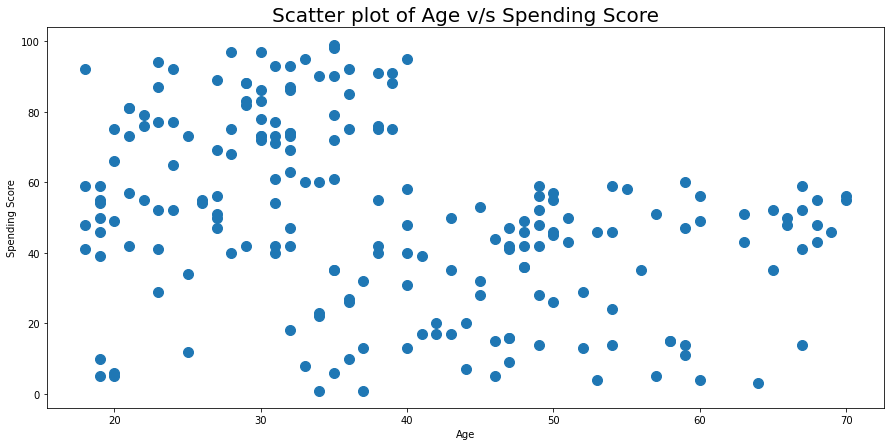

In [92]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending_Score', data = Dataframe, s = 100)
plt.show()

In [93]:
X1 = Dataframe[['Age' , 'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



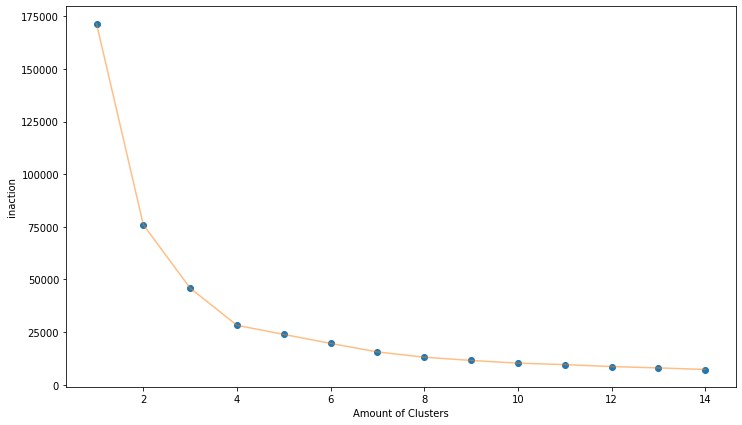

In [94]:
plt.figure(1 , figsize = (12 ,7))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Amount of Clusters') , plt.ylabel('inaction')
plt.show()

In [95]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 100  , algorithm='elkan') )
algorithm.fit(X1)
centroids1 = algorithm.cluster_centers_
labels1 = algorithm.labels_

In [96]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

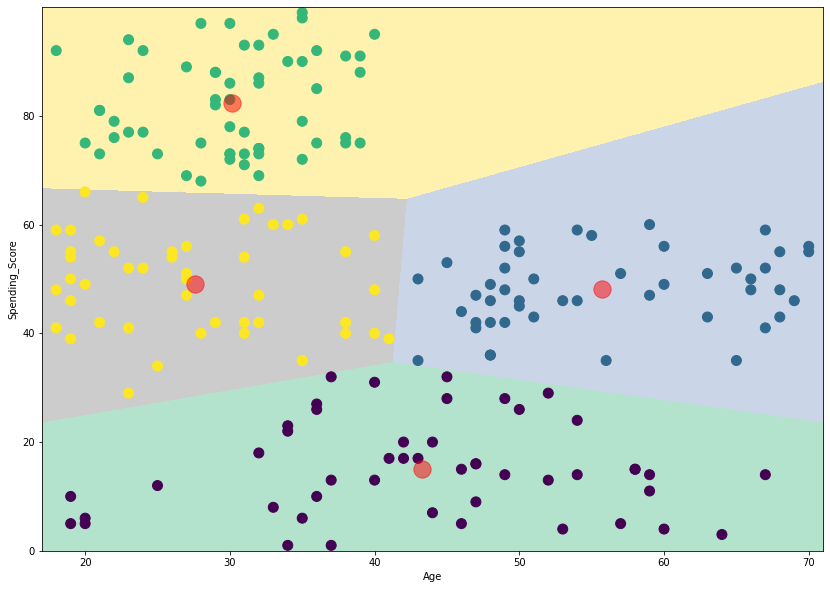

In [97]:
plt.figure(1 , figsize = (14 , 10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending_Score', data = Dataframe, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending_Score') , plt.xlabel('Age')
plt.show()

In [98]:
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 100 , algorithm='elkan'))
algorithm.fit(X1)
centroids1 = algorithm.cluster_centers_
labels1 = algorithm.labels_

In [99]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

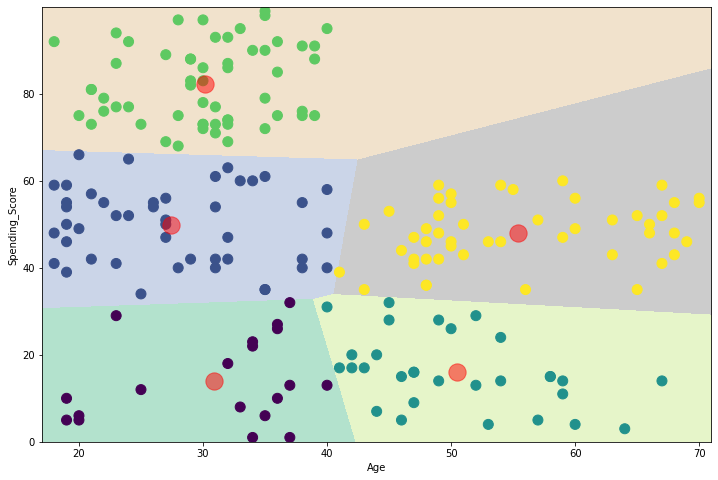

In [100]:
plt.figure(1 , figsize = (12 , 8) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending_Score', data = Dataframe, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending_Score') , plt.xlabel('Age')
plt.show()

In [101]:
X2 = Dataframe[['Annual_Income' , 'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



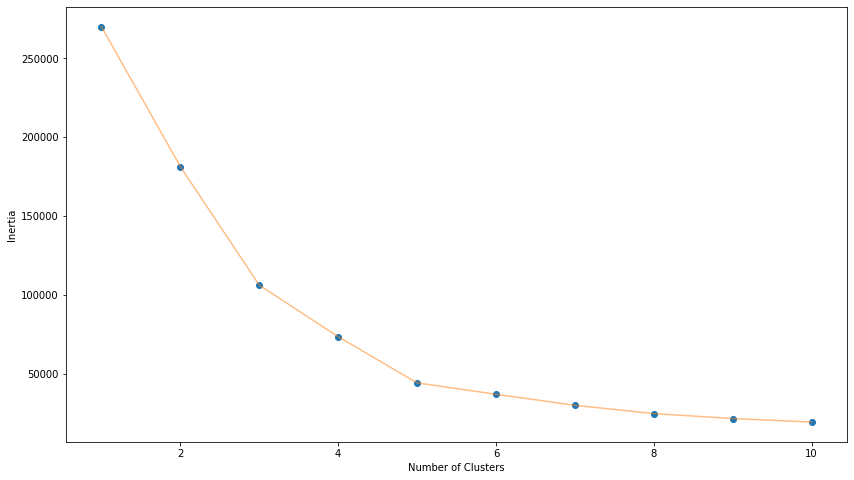

In [102]:
plt.figure(1 , figsize = (14 ,8))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()  

In [103]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
centroids2 = algorithm.cluster_centers_
labels2 = algorithm.labels_

In [104]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

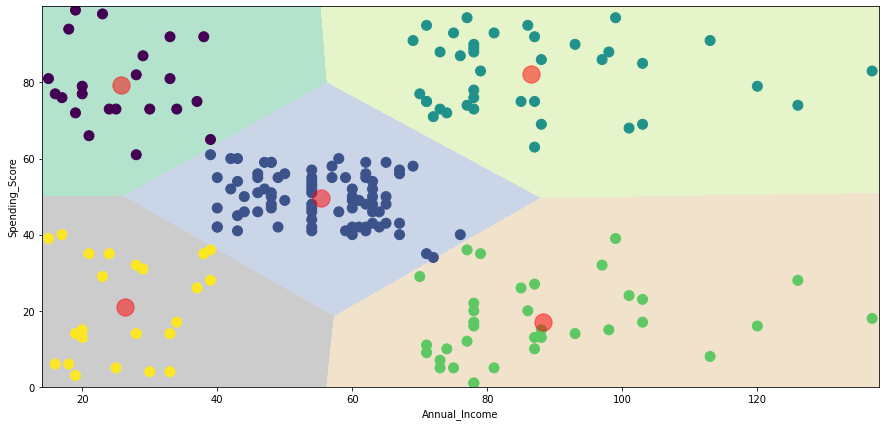

In [105]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual_Income' ,y = 'Spending_Score' , data = Dataframe , c = labels2 , s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending_Score') , plt.xlabel('Annual_Income')
plt.show()

In [106]:
X3 = Dataframe[['Age' , 'Annual_Income' ,'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



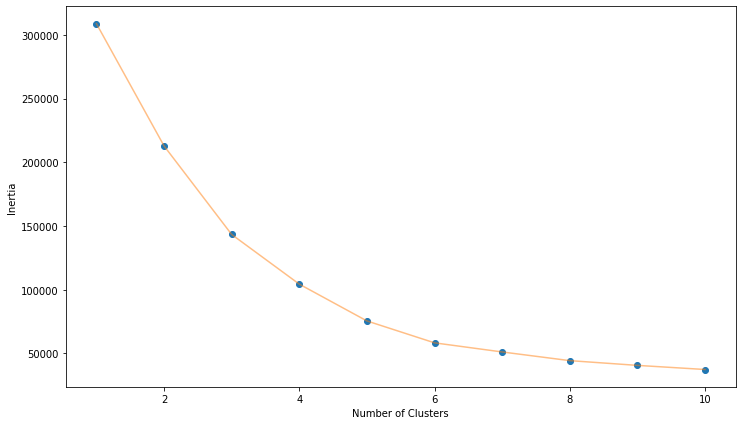

In [107]:
plt.figure(1 , figsize = (12 ,7))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [108]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
Dataframe['cluster'] = pd.DataFrame(y_kmeans)
Dataframe.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


In [109]:
trace1 = go.Scatter3d(
    x= Dataframe['Age'],
    y= Dataframe['Spending_Score'],
    z= Dataframe['Annual_Income'],
    mode='markers',
     marker=dict(
        color = Dataframe['cluster'], 
        size= 10,
        line=dict(
            color= Dataframe['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters with respect to Age, Income, and Spending Scores',
    scene = dict( xaxis = dict(title  = 'Age'), yaxis = dict(title  = 'Spending Score'), zaxis = dict(title  = 'Annual Income')))
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)